## Importing Datasets

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train.drop(columns='label')
y = train['label']
X_test = test


In [5]:
print(X.shape,X_test.shape)

(42000, 784) (28000, 784)


## Split data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_val,y_train,y_val  = train_test_split(X,y,test_size = 0.1,random_state = 101)

In [8]:
X_train.shape

(37800, 784)

In [9]:
X_val.shape

(4200, 784)

In [10]:
X_train = X_train.values.reshape(-1,28,28)
X_val = X_val.values.reshape(-1,28,28)


In [11]:
X_train.shape

(37800, 28, 28)

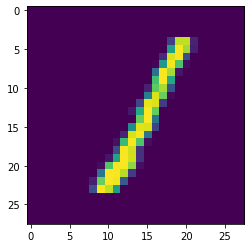

In [12]:
plt.imshow(X_train[6]);

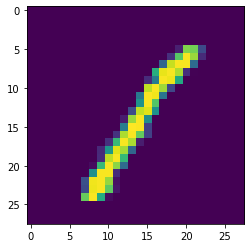

In [13]:
plt.imshow(X_val[6]);

In [14]:
y_val.shape

(4200,)

## Converting y label to categories

In [15]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train)
y_cat_val = to_categorical(y_val)

In [16]:
y_cat_train.shape

(37800, 10)

### Scaling features

In [17]:
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [18]:
print(X_train.min(),X_train.max())

0.0 1.0


### We need to add 1 more dimension to specify to specify it is black and white image

In [19]:
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [20]:
input_shape = X_train.shape
input_shape

(37800, 28, 28, 1)

In [21]:
y_cat_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

## Building the model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout


In [23]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Implementing early stopping

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss',patience=1)

In [26]:
X_train.shape

(37800, 28, 28, 1)

In [27]:
model.fit(X_train,y_cat_train,callbacks=[callback],epochs=10,validation_data=(X_val,y_cat_val))

Epoch 1/10
1182/1182 [==============================] - 43s 36ms/step - loss: 0.1587 - accuracy: 0.9506 - val_loss: 0.0655 - val_accuracy: 0.9783
Epoch 2/10
1182/1182 [==============================] - 40s 34ms/step - loss: 0.0503 - accuracy: 0.9841 - val_loss: 0.0500 - val_accuracy: 0.9843
Epoch 3/10
1182/1182 [==============================] - 37s 31ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0513 - val_accuracy: 0.9826


In [28]:
metrics = pd.DataFrame(model.history.history)

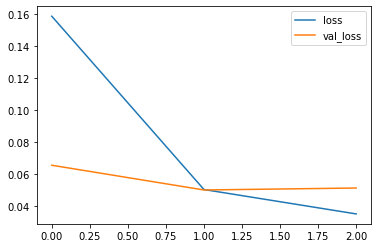

In [29]:
metrics[['loss','val_loss']].plot();

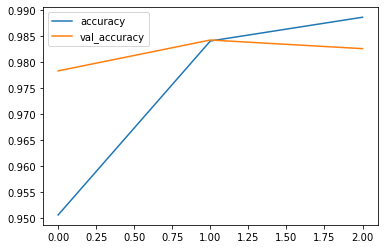

In [30]:
metrics[['accuracy','val_accuracy']].plot();

In [31]:
model.predict(X_train)[0]

array([6.8092540e-06, 8.4453413e-09, 6.0398230e-07, 5.5851853e-08,
       5.1308948e-09, 1.8464910e-08, 4.6459903e-09, 3.3295208e-10,
       9.9997544e-01, 1.7031507e-05], dtype=float32)

In [32]:
model.evaluate(X_val,y_cat_val)

132/132 [==============================] - 1s 7ms/step - loss: 0.0513 - accuracy: 0.9826


[0.05126500502228737, 0.982619047164917]

In [33]:
y_pred = model.predict(X_val)

### Evaluation

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

predictions = model.predict_classes(X_val)

cm = confusion_matrix(y_val,predictions)
cr = classification_report(y_val,predictions)

print('Confusion matrix \n {} \n'.format(cm))
print('Classification report \n {}'.format(cr))

Confusion matrix 
 [[409   0   0   0   0   0   0   0   0   0]
 [  0 447   1   0   0   0   0   0   0   0]
 [  1   1 413   0   0   0   0   0   0   1]
 [  0   1   3 403   0   3   0   0   0   6]
 [  0   1   0   0 393   0   0   1   1  15]
 [  1   0   0   2   0 355   2   0   0   5]
 [  1   1   0   0   0   0 425   0   0   0]
 [  0   2   3   1   0   0   0 426   0   5]
 [  3   1   2   0   1   0   0   0 407   2]
 [  2   0   0   0   2   0   0   0   2 449]] 

Classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       409
           1       0.98      1.00      0.99       448
           2       0.98      0.99      0.99       416
           3       0.99      0.97      0.98       416
           4       0.99      0.96      0.97       411
           5       0.99      0.97      0.98       365
           6       1.00      1.00      1.00       427
           7       1.00      0.97      0.99       437
           8       0.99      0.98    

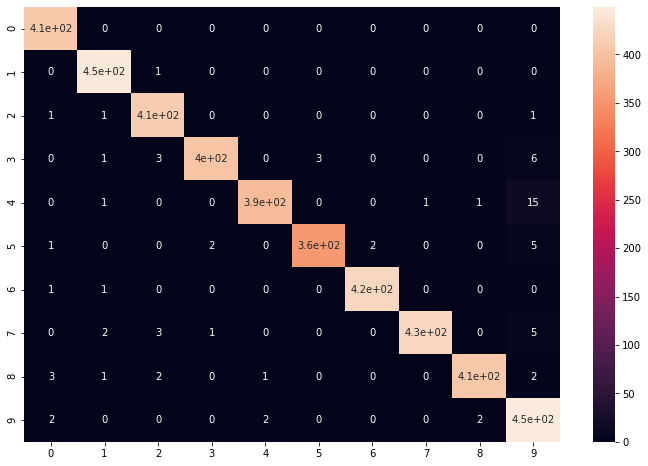

In [35]:
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(cm,annot=True);

In [36]:
X_test.shape

(28000, 28, 28, 1)

## Submission evaluation

In [37]:
test_pred = pd.Series(model.predict_classes(X_test),name = 'Label')

In [38]:
ImageId = pd.DataFrame(np.arange(1,28001),columns=['ImageId'])

In [39]:
final_pred = pd.concat([ImageId,test_pred],axis=1)

In [40]:
final_pred

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [41]:
final_pred.to_csv('submission.csv',index=False)